In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

In [48]:
class state:
    '''
    Policy
    These are what the policy numbers stand for:
        3
       1 2
        0
        
    '''
    def __init__(self):
        self.utility = 0
        self.policy = None
        self.reward = None
        self.Q = [0 for i in range(4)] #Q(state, action) = value of taking action from state
        self.N = [0 for i in range(4)] #N(state, action) = # of times we explored action from state 
        
    def setReward(self, reward):
        self.reward = reward
        
    def getReward(self):
        return self.reward
    
    def getUtility(self):
        return self.utility
    
    def getPolicy(self):
        return self.policy

class grid:
    '''
    A 6x6 grid is mapped as:
    
    30 31 32 33 34 35
    24 25 26 27 28 29 
    18 19 20 21 22 23
    12 13 14 15 16 17
    6  7  8  9  10 11
    0  1  2  3  4  5
    '''
    def __init__(self, width, height):
        self.height = height
        self.width = width
        self.size = self.width*self.height
        self.grid = [state() for i in range(self.size)] 
     
    #Enter rewards as an array interpretted as rewards[x*width + height]
    def setGridRewards(self, rewards):
        empty = -0.4
        for i in range(len(rewards)):
            self.grid[i].setReward(rewards[i])
            self.grid[i].utility = rewards[i]
            
        #initialize states as rewards
        for s in range(self.size):
            if s != empty:
                for a in range(4):
                    self.grid[s].Q[a] = self.grid[s].reward
            
    def printGridRewards(self):
        for i in reversed(range(self.height)):
            for j in range(self.width):
                if self.grid[i*self.width+j].reward == None:
                    print "\t X",
                else:
                    print "\t", self.grid[i*self.width+j].reward,
            print
            
    def getUtilities(self):
        utilities = []
        for i in reversed(range(self.height)):
            for j in range(self.width):
                if self.grid[i*self.width+j].utility == None:
                    utilities.append(0)
                else:
                    utilities.append(self.grid[i*self.width+j].utility)
        return utilities                    
            
    def printGridUtility(self):
        for i in reversed(range(self.height)):
            for j in range(self.width):
                if self.grid[i*self.width+j].utility == None:
                    print "\t X",
                else:
                    print "\t", round(self.grid[i*self.width+j].utility,3),
            print
    
    def print_TD_Q(self):
        for i in reversed(range(self.height)):
            for j in range(self.width):
                if self.grid[i*self.width+j].utility == None:
                    print "\t X",
                else:
                    print "\t", round(max(self.grid[i*self.width+j].Q),3),
            print
    
    def printGridPolicy(self):
        moves = ['D ', 'L ', 'R ', 'U ']
        for i in reversed(range(self.height)):
            for j in range(self.width):
                if self.grid[i*self.width+j].policy == None:
                    if self.grid[i*self.width+j].reward > 0:
                        print str(self.grid[i*self.width+j].reward) + ' ',
                    elif self.grid[i*self.width+j].reward == None:
                        print 'X ',
                    else:
                        print str(self.grid[i*self.width+j].reward),
                else:
                    print moves[self.grid[i*self.width+j].policy],
            print
    
    def valueIteration(self, gamma, empty, numIterations = 50, terminal = True):
        for i in range(numIterations):
            for j in range(self.size):
                expectedUtility = []
                
                #set expected utilities. If terminal states are turned off then allow terminal state utilities to be updated.
                if self.grid[j].reward == empty or (self.grid[j].reward != None and terminal == False):
                    
                    # find utility of neighbors
                    if j >= self.width:
                        bottomUtility = self.grid[j-self.width].utility
                    else:
                        bottomUtility = self.grid[j].utility
                    
                    if j%self.width != 0:
                        leftUtility = self.grid[j-1].utility
                    else:
                        leftUtility = self.grid[j].utility
                        
                    if j%self.width != self.width - 1:
                        rightUtility = self.grid[j+1].utility
                    else:
                        rightUtility = self.grid[j].utility
                        
                    if j < (self.height-1)*self.width:
                        topUtility = self.grid[j+self.width].utility
                    else:
                        topUtility = self.grid[j].utility
                    
                    #if you hit a wall stay in the same state
                    if bottomUtility == None:
                        bottomUtility = self.grid[j].utility
                    if leftUtility == None:
                        leftUtility = self.grid[j].utility
                    if rightUtility == None:
                        rightUtility = self.grid[j].utility
                    if topUtility == None:
                        topUtility = self.grid[j].utility
                        
                    expectedUtility.append(0.8*bottomUtility+0.1*leftUtility+0.1*rightUtility)
                    expectedUtility.append(0.8*leftUtility+0.1*topUtility+0.1*bottomUtility)
                    expectedUtility.append(0.8*rightUtility+0.1*topUtility+0.1*bottomUtility)
                    expectedUtility.append(0.8*topUtility+0.1*leftUtility+0.1*rightUtility)
                    
                    self.grid[j].policy = expectedUtility.index(max(expectedUtility))
                    self.grid[j].utility = self.grid[j].reward+gamma*max(expectedUtility)
    
    def f(self, Q, N):
        Ne = 5
        if N < Ne:
            return 2
        else:
            return Q
        
    def Q(self, s, a):
        return self.grid[s].Q[a]
    
    def N(self, s, a):
        return self.grid[s].N[a]
    
    def alpha(self, t):
        return 60.0/(59.0+t)
    
    def getQEstimates(self):
        utilities = []
        for i in reversed(range(self.height)):
            for j in range(self.width):
                if self.grid[i*self.width+j].utility == None:
                    utilities.append(0)
                else:
                    utilities.append(max(self.grid[i*self.width+j].Q))
        return utilities
    
    def getSuccessorState(self, s, a):
        integer = random.randint(1, 10)
    
        direction = 0
        if integer <= 8:
            direction = a
        elif integer == 9:
            #go to the right of intended direction
            direction = (a+2)%4
        else:
            #go to the left of intended direction
            if a == 0:
                direction = 1
            elif a == 1:
                direction = 0
            elif a == 2:
                direction = 3
            else:
                direction = 2
        
        if direction == 0:
            if s < self.width:
                successor = s
            elif self.grid[s-self.width].reward == None:
                successor = s
            else:
                successor = s - self.width

        elif direction == 1:
            if s % self.width == 0:
                successor = s
            elif self.grid[s-1].reward == None:
                successor = s
            else:
                successor = s - 1

        elif direction == 2:
            if s % self.width == self.width-1:
                successor = s
            elif self.grid[s+1].reward == None:
                successor = s
            else:
                successor = s + 1

        else:
            if s >= (self.height-1)*self.width:
                successor = s
            elif self.grid[s+self.width].reward == None:
                successor = s
            else:
                successor = s + self.width
                
        if self.grid[successor].reward == None:
            successor = s
        
        return successor
    
    def TD_Q(self, gamma, empty, start):
        RMSE = []
        s = start
        while self.grid[s].reward == empty:
            #from the current state, select an action
            maxValue = -1
            b = []
            a = 0
            for j in range(4):
                value = self.f(self.Q(s,j), self.N(s,j))
                b.append(value) 
                a = b.index(max(b))
                '''
                if value > maxValue:
                    maxValue = value
                    a = j
                '''

            self.grid[s].N[a] += 1 #increment number of times action a was taken from s
            self.grid[s].policy = a

            #get successor state given state and action
            successor = self.getSuccessorState(s,a)

            #perform TD update
            self.grid[s].Q[a] = self.Q(s,a) + self.alpha(self.N(s,j)+1)*(self.grid[s].reward + 
                                                             gamma*max(self.grid[successor].Q)-self.Q(s,a))
            s = successor
                

In [5]:
empty = -0.4
newgrid = grid(6,6)
newgrid.setGridRewards([1,-1, empty, None, -1, -1,
                    empty, empty, empty, empty, empty, empty,
                    empty, empty, empty, None, empty, empty,
                    empty, empty, empty, None, empty, 3,
                    empty, empty, empty, None, -1, empty,
                    empty, -1, empty, empty, empty, empty,
                   ])
newgrid.valueIteration(0.99, -0.4, terminal = False)
newgrid.printGridUtility()
newgrid.printGridPolicy()

	81.65 	85.122 	89.429 	93.164 	96.67 	99.846
	79.37 	82.549 	85.788 	 X 	98.168 	102.191
	76.941 	79.645 	82.266 	 X 	100.536 	104.673
	77.937 	81.079 	84.266 	 X 	97.369 	100.794
	79.058 	82.562 	86.419 	90.429 	93.944 	97.006
	77.639 	79.029 	82.723 	 X 	89.999 	92.574
R  R  R  R  R  D 
R  R  U  X  D  D 
R  R  U  X  R  R 
R  R  D  X  U  U 
R  R  R  R  U  U 
U  R  U  X  U  U 


	-1.204 	-1.0 	-1.1 	-0.815 	-0.983 	0.57
	-1.198 	-1.14 	-1.198 	 X 	-1.0 	1.472
	-0.538 	-1.209 	-1.235 	 X 	1.7 	3.0
	-0.216 	-0.633 	-1.261 	 X 	0.744 	1.697
	0.299 	-0.202 	-1.17 	-0.482 	-0.048 	0.591
	1.0 	-1.0 	-1.109 	 X 	-1.0 	-1.0
R  -1 L  R  D  D 
R  U  L  X  -1 D 
D  U  U  X  R  3 
D  D  U  X  U  U 
D  L  D  R  U  U 
1  -1 L  X  -1 -1


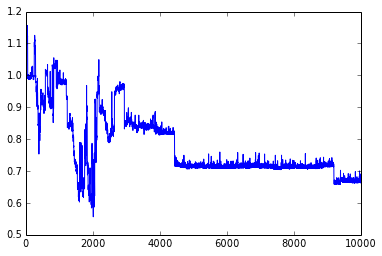

In [49]:
empty = -0.4
newgrid = grid(6,6)
newgrid.setGridRewards([1,-1, empty, None, -1, -1,
                    empty, empty, empty, empty, empty, empty,
                    empty, empty, empty, None, empty, empty,
                    empty, empty, empty, None, empty, 3,
                    empty, empty, empty, None, -1, empty,
                    empty, -1, empty, empty, empty, empty,
                   ])
newgrid.valueIteration(0.99, empty)
rmse = []
t = 1
for i in range(10000):
    newgrid.TD_Q(0.70, empty, 13)
    utilities = np.array(newgrid.getUtilities())
    estimates = np.array(newgrid.getQEstimates())
    newRMSE = np.sqrt(float(sum((utilities - estimates)**2))/newgrid.size)
    rmse.append(newRMSE)
newgrid.print_TD_Q()
newgrid.printGridPolicy()
plt.plot(range(10000), rmse)

In [17]:
empty = -0.4
newgrid = grid(6,6)
newgrid.setGridRewards([1,-1, empty, None, -1, -1,
                    empty, empty, empty, empty, empty, empty,
                    empty, empty, empty, None, empty, empty,
                    empty, empty, empty, None, empty, 3,
                    empty, empty, empty, None, -1, empty,
                    empty, -1, empty, empty, empty, empty,
                   ])
newgrid.valueIteration(0.99, empty)
newgrid.printGridUtility()
newgrid.printGridPolicy()
utilities = np.array(newgrid.getUtilities())

	-1.455 	-1.0 	-0.34 	0.229 	0.737 	1.468
	-1.201 	-1.307 	-0.887 	 X 	-1.0 	2.083
	-0.698 	-1.067 	-0.901 	 X 	2.058 	3.0
	-0.155 	-0.643 	-0.387 	 X 	1.829 	2.394
	0.409 	-0.239 	0.146 	0.79 	1.306 	1.804
	1.0 	-1.0 	-0.426 	 X 	-1.0 	-1.0
R  -1 R  R  R  D 
D  R  U  X  -1 D 
D  D  D  X  R  3 
D  D  D  X  R  U 
D  L  R  R  U  U 
1  -1 U  X  -1 -1
